# iPlant Groep D
# Classificatiemodel

**Nodige modules importeren**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Data uit bestand 'punten.dat' inlezen en weergeven in tabel**

In [2]:
punten = pd.read_csv('punten.dat') 
punten

,x,y,klasse
0,0.0,6.0,blauw
1,0.5,5.0,blauw
2,3.0,13.0,blauw
3,2.5,9.0,blauw
4,1.8,3.2,blauw
5,13.0,18.0,blauw
6,6.5,11.0,blauw
7,11.0,14.0,blauw
8,9.5,8.0,blauw
9,14.0,4.5,blauw


**Er zijn 2 kenmerken: x en y <br>
Het label 'klasse' neemt 2 waarden aan, 'groen' of 'blauw'.**

**De kenmerken x en y, respectievelijk x1 en x2, omzetten naar kolommen in NumPy-matrix X**

In [4]:
x1 = np.array(punten['x'])
x2 = np.array(punten['y'])
X  = np.stack((x1,x2), axis=1) # axis=1 stelt x1 en x2 als kolommen in de nieuwe matrix
print(X)

[[ 0.   6. ]
 [ 0.5  5. ]
 [ 3.  13. ]
 [ 2.5  9. ]
 [ 1.8  3.2]
 [13.  18. ]
 [ 6.5 11. ]
 [11.  14. ]
 [ 9.5  8. ]
 [14.   4.5]
 [ 6.5  3.5]
 [-3.5 14. ]
 [ 0.2 16. ]
 [ 1.8 13. ]
 [ 1.  11. ]
 [ 1.  10. ]
 [ 5.5 14. ]
 [ 4.3 11.5]
 [ 6.  17. ]
 [ 4.  18. ]
 [ 8.5 15.3]
 [ 0.9  7. ]]


**Data weergeven in een puntenwolk**

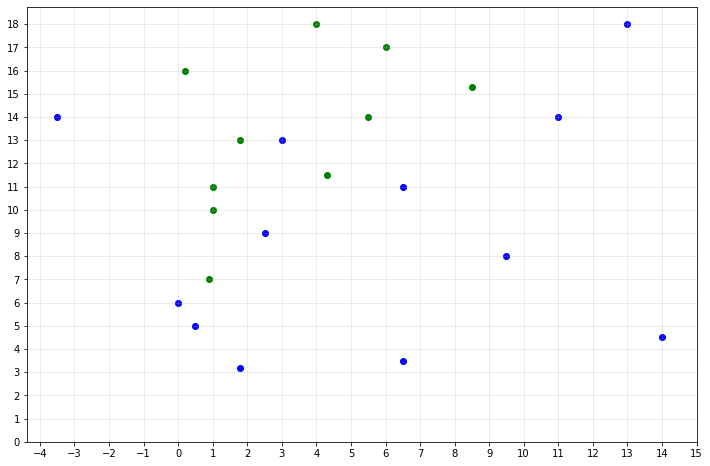

In [5]:
plt.figure(figsize=(12,8))     

plt.scatter(x1[:12], x2[:12], color="blue", marker="o")      # de eerste 11 metingen hebben klasse blauw
plt.scatter(x1[12:], x2[12:], color="green", marker="o")     # de rest heeft dus klasse groen
plt.xticks(np.arange(-4,16,1))
plt.yticks(np.arange(0,19,1))
plt.grid(axis='both',alpha=0.3)

plt.show()

**De punten zijn duidelijk niet lineair scheidbaar. <br>
Bijgevolg construeren we een gebroken scheidingsrechte die wel kan fungeren als decision boundary**

In [6]:
# domeinen van de verschillende lijnstukken

x_1 = np.linspace(-3,1,10)     
x_2 = np.linspace(1,3,10)
x_3 = np.linspace(3,4,10)
x_4 = np.linspace(4,12,10)

# vergelijkingen van de respectievelijke lijnstukken

y_1 = -2.5*x_1 + 7.5     # vgl rechte door de punten (-3,15) (1,5)
y_2 = 5*x_2              # vgl rechte door de punten (1,5)   (3,15)
y_3 = -6*x_3 + 33        # vgl rechte door de punten (3,15)  (4,9)
y_4 = 1.25*x_4 + 4       # vgl rechte door de punten (4,9)   (8,14)

**Puntenwolk met decision boundary weergeven**

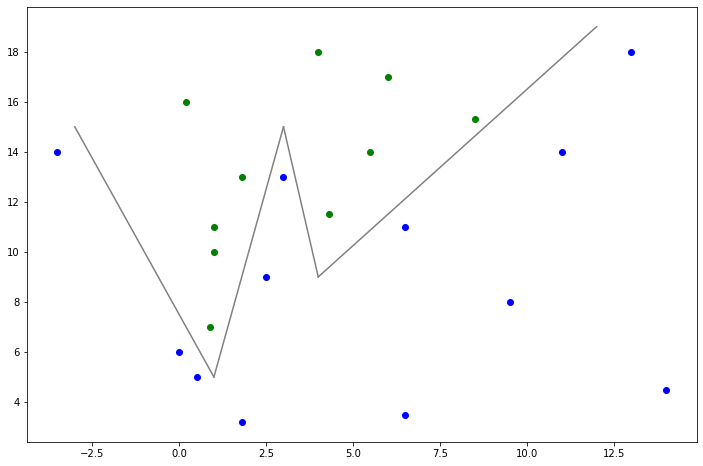

In [7]:
plt.figure(figsize=(12,8))

# datapunten
plt.scatter(x1[:12], x2[:12], color="blue", marker="o")
plt.scatter(x1[12:], x2[12:], color="green", marker="o")

# decision boundary
plt.plot(x_1, y_1,color='gray')
plt.plot(x_2, y_2,color='gray')
plt.plot(x_3, y_3,color='gray')
plt.plot(x_4, y_4,color='gray')

plt.show()

**We splitsen nu de waarden op in 2 deeldomeinen. <br>Op die manier is het classificatieprobleem herleid naar 2 kleinere problemen die gemakkelijker om handen zijn voor het classificatiemodel.<br> 
We kiezen hierbij de x-waarde van de top tussen de 2de en 3de scheidingsrechte als grenspunt: $\mathbf{x_{1}= 3}$**<br>

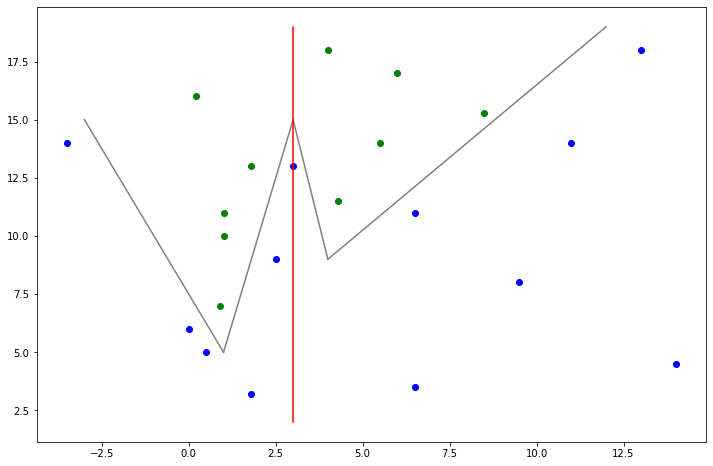

In [8]:
plt.figure(figsize=(12,8))

# datapunten
plt.scatter(x1[:12], x2[:12], color="blue", marker="o")
plt.scatter(x1[12:], x2[12:], color="green", marker="o")

# decision boundary
plt.plot(x_1, y_1,color='gray')
plt.plot(x_2, y_2,color='gray')
plt.plot(x_3, y_3,color='gray')
plt.plot(x_4, y_4,color='gray')

# grafiek opdelen in 2 deeldomeinen in x1 = 3
plt.plot([3,3],[19,2],c='r')

plt.show()

**Tussen de input- en hidden layer worden lineaire combinaties gemaakt met de punten en de bijhorende weights en bias. Deze weights en bias zijn de coëfficiënten uit de vergelijkingen van de 4 scheidingsrechten. De lineaire combinaties worden gemaakt met behulp van matrixvermenigvuldiging.**

In [9]:
wih_d1 = np.array([[-2.5, -1], [5, -1]])
bih_d1 = np.array([[7.5],[0]])
wih_d2 = np.array([[-6, -1], [1.25, -1]])
bih_d2 = np.array([[33],[4]])

**Activatiefuncties:**

In [10]:
def deeldomein(matrix):
    """Bepaalt in welk deeldomein het punt hoort. Levert 0 of 1 voor respectievelijk x1 < 3 en x1 >= 3."""
    return np.heaviside(x1-3,1)

def relu(x):
    """Zet negatieve waarden op 0. ReLU(x) = max(0,x)"""
    return np.maximum(0,x)

def heaviside(x):
    """Geeft 0 voor negatieve waarden en 1 voor positieve waarden"""
    return np.heaviside(x,0)

**Hidden layer:**

In [11]:
# lineaire combinaties van de punten met de bijhorende weights voor het 1ste deeldomein.
# de factor met de pseudo-activatiefunctie 'deeldomein' zorgt ervoor dat enkel deze punten binnen het domein in acht worden genomen.
hidden_input_d1 = (np.dot(wih_d1,X.T)+bih_d1) * (1-deeldomein(X))
hidden_input_d2 = (np.dot(wih_d2,X.T)+bih_d2) * deeldomein(X)

# Als de waarde van deze lineaire combinatie positief is betekent het dat het punt in kwestie boven de scheidingsrechte ligt.
# De negatieve waarden liggen eronder en worden op 0 gezet door de ReLU-activatiefunctie.
hidden_output_d1 = relu(hidden_input_d1)
hidden_output_d2 = relu(hidden_input_d2)

hidden_output = hidden_output_d1 + hidden_output_d2
print(hidden_output)

[[ 1.5    1.25   2.     0.     0.     0.     0.     0.     0.     0.
   0.     2.25   0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.     3.5    5.8    2.25   1.125  3.75   7.875 17.
   8.625  0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]]


**Uitvoerlaag:**

**Elk van de 2 outputs van de hidden layer toont voor de punten binnen diens domein een strikt positieve waarde aan waar het punt boven de decision boundary (groen) ligt, elders (blauw) is die waarde exact 0. We stellen deze klasse voor met 0, en de punten onder de rechte met 1.**

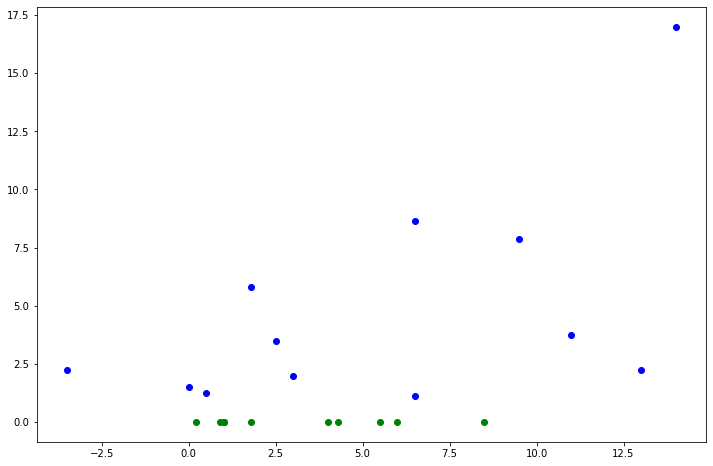

In [12]:
who = np.array([1,1]) # weights tussen hidden en output layer
final_input = np.dot(who,hidden_output)

plt.figure(figsize=(12,8))

plt.scatter(x1[:12], final_input[:12], color="blue", marker="o")
plt.scatter(x1[12:], final_input[12:], color="green", marker="o")

plt.show()

**De uitvoerlaag neemt dus de som van de outputs van de hidden layer en geeft na toepassen van de Heaviside-activatiefunctie de klasse terug:**

In [13]:
final_output = np.heaviside(final_input,0).astype(int)
final_output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Deze klassen komen overeen met de gegeven labels.**

**Gieten we nu alles samen in een classificatiemodel:**

In [14]:
def deeldomein(matrix):
    """Bepaalt in welk deeldomein het punt hoort. Levert 1 voor x1 >= 3 en 0 voor x1 < 3."""
    return np.heaviside(matrix[0]-3,1)

def relu(x):
    """Zet negatieve waarden op 0. ReLU(x) = max(0,x)"""
    return np.maximum(0,x)

def heaviside(x):
    """Geeft 0 voor negatieve waarden en 1 voor positieve waarden"""
    return np.heaviside(x,0)[0]

class Model():
    
    def __init__(self):
        
        self.wih_d1 = np.array([[-2.5, -1], [5, -1]])    # weights tussen input en hidden layer voor deeldomein 1
        self.bih_d1 = np.array([[7.5],[0]])              # bias tussen input en hidden layer voor deeldomein 1
        self.wih_d2 = np.array([[-6, -1], [1.25, -1]])   # weights tussen input en hidden layer voor deeldomein 2
        self.bih_d2 = np.array([[33],[4]])               # bias tussen input en hidden layer voor deeldomein 2
        
        self.who = np.array([1,1])                       # weights tussen hidden layer en output layer
        
        self.activatiefunctie_hidden = relu              # activatie-functie van de hidden layer
        self.activatiefunctie_output = heaviside         # activatie-functie van de output layer
       
    def predict(self, kenmerken, stringoutput=False):
        
        input = np.array(kenmerken, ndmin=2).T           # transponeren om te kunnen vermenigvuldigen
        
        hidden_input_d1 = (np.dot(self.wih_d1, input) + self.bih_d1) * (1-deeldomein(input))
        hidden_input_d2 = (np.dot(self.wih_d2, input) + self.bih_d2) * deeldomein(input)
        
        hidden_output_d1 = self.activatiefunctie_hidden(hidden_input_d1)
        hidden_output_d2 = self.activatiefunctie_hidden(hidden_input_d2)
        hidden_output = hidden_output_d1 + hidden_output_d2
        
        final_input = np.dot(self.who, hidden_output)
        final_output = self.activatiefunctie_output(final_input)
        
        return int(final_output.item())*'blauw' + (1-int(final_output.item()))*'groen' if stringoutput else final_output

**Het model uittesten voor bepaalde waarde**

In [15]:
model = Model()
a,b = float(input('x-waarde:')), float(input('y-waarde:'))
print('De geschatte klasse voor het punt (%d,%d) is %s' %(a, b, model.predict(np.array([a,b]),stringoutput=True)))

x-waarde:7
y-waarde:3
De geschatte klasse voor het punt (7,3) is blauw


**Visuele voorstelling van het model**

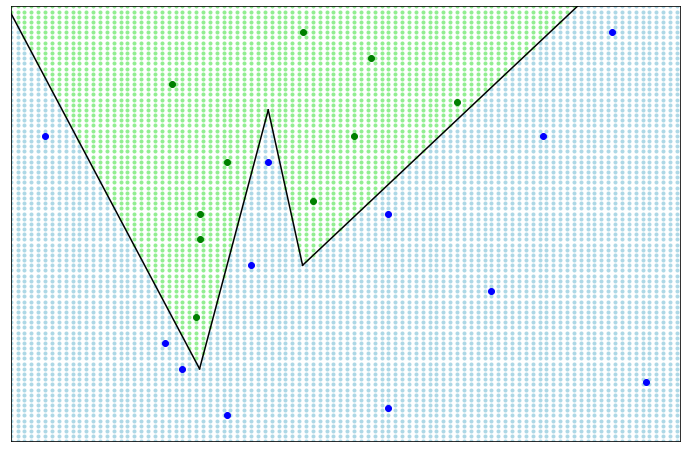

In [18]:
# raster maken met resolutie 0.2
xx1 = np.arange(x1.min()-1, x1.max()+1, 0.2)
xx2 = np.arange(x2.min()-1, x2.max()+4, 0.2)  

# domeinen van de verschillende lijnstukken
x_1 = np.linspace(-5,1,10)     
x_2 = np.linspace(1,3,10)
x_3 = np.linspace(3,4,10)
x_4 = np.linspace(4,14,10)

# vergelijkingen van de respectievelijke lijnstukken
y_1 = -2.5*x_1 + 7.5     # vgl rechte door de punten (-3,15) (1,5)
y_2 = 5*x_2              # vgl rechte door de punten (1,5)   (3,15)
y_3 = -6*x_3 + 33        # vgl rechte door de punten (3,15)  (4,9)
y_4 = 1.25*x_4 + 4       # vgl rechte door de punten (4,9)   (8,14)

plt.figure(figsize=(12,8))

# klassezones inkleuren
for a in xx1:
    for b in xx2:
        A = np.array([a, b])
        if model.predict(A) == 0:
            kleur = "lightgreen"
        else:
            kleur = "lightblue"
        plt.plot(a, b, marker='.', color=kleur,zorder=1)
        
# decision boundary
plt.plot(x_1, y_1,color='black',zorder=5)          
plt.plot(x_2, y_2,color='black',zorder=5)
plt.plot(x_3, y_3,color='black',zorder=5)
plt.plot(x_4, y_4,color='black',zorder=5)
        
# datapunten
plt.scatter(x1[:12], x2[:12], color="blue", marker="o",zorder=10)    
plt.scatter(x1[12:], x2[12:], color="green", marker="o",zorder=10)

plt.ylim(np.min(x2)-1,np.max(x2)+1)
plt.xlim(np.min(x1)-1,np.max(x1)+1)
plt.xticks([])
plt.yticks([])

plt.show()